# Image transformation pipeline

This example shows a basic pipeline that reads some frames, resizes them and writes them in an output video.

Note that the VideoWriter needs to be initialized with the desired output width and height, which are not available until the first iteration of the Resizer. This is a current limitation of the library: some attributes that affect multiple components must be defined at pipeline instantiation and are inmutable.

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from videoanalytics.pipeline import Pipeline
from videoanalytics.pipeline.sources import VideoReader
from videoanalytics.pipeline.sinks import VideoWriter
from videoanalytics.pipeline.sinks.transformation import Resizer

Note: the video used in this example was downloaded from [youtube](https://www.youtube.com/watch?v=WgCe0tMO4lA).

In [3]:
DATA_PATH = "../data"

# Input
INPUT_VIDEO = DATA_PATH+"/input/test_video.mp4"
START_FRAME = 0
MAX_FRAMES = 100

In [4]:
%%HTML
<div style="text-align: center">
    <video width="600" height="400" controls>
      <source src="../data/input/test_video.mp4" type="video/mp4">
    </video>
</div>

In [5]:
# Output
OUTPUT_VIDEO = DATA_PATH+ "/output/test_output.avi"

RESIZE_WIDTH = 320
RESIZE_HEIGHT = 240

In [6]:
# 1. Create the global context
context = {}

# 2. Create the pipeline
pipeline = Pipeline()

# 3. Add components

# 3.1 Source
pipeline.add_component( VideoReader( "input",context,
                 video_path=INPUT_VIDEO,
                 start_frame=START_FRAME,
                 max_frames=MAX_FRAMES))

# 3.2 Resizer
pipeline.add_component( Resizer("resizer",context,output_w=RESIZE_WIDTH,output_h=RESIZE_HEIGHT) )

# 3.3 Sink
pipeline.add_component(VideoWriter("writer",context,
                                   filename=OUTPUT_VIDEO,
                                   fps=None,
                                   width=RESIZE_WIDTH,
                                   height=RESIZE_HEIGHT
                                  ))

In [7]:
# 4. Define connections
pipeline.set_connections([
    ("input", "resizer"),
    ("resizer", "writer")
])

In [8]:
# 5. Remove isolated components (if any) and plot.
pipeline.optimize()

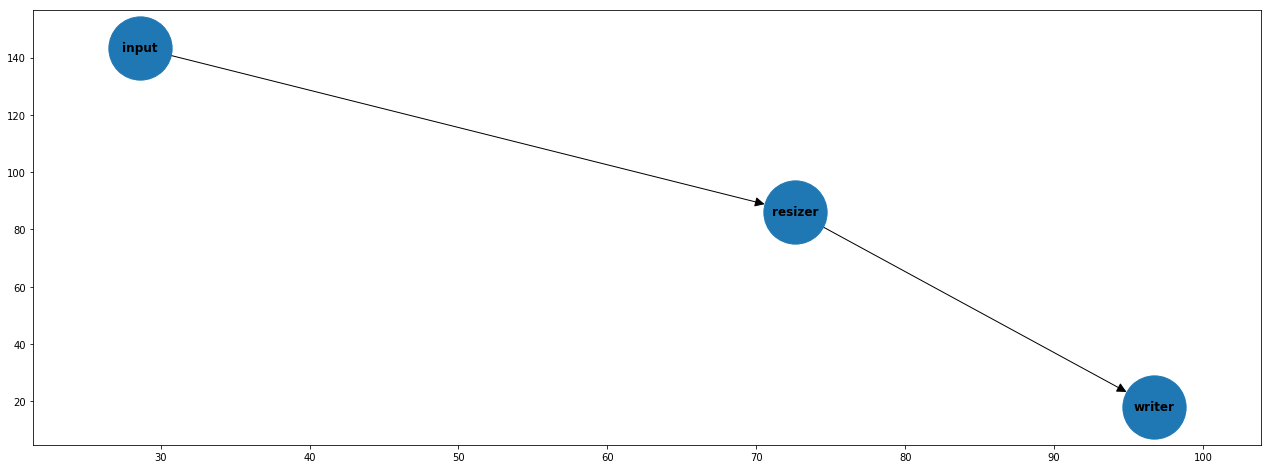

In [9]:
import matplotlib.pyplot as plt

fig,axes = plt.subplots(1,1,figsize=(22,8))
pipeline.plot(ax=axes)

In [10]:
# 5. Execute
pipeline.execute()
print("Total execution time [s]:", pipeline.get_total_execution_time())

  0%|          | 0/100.0 [00:00<?, ?it/s]

Total execution time [s]: 2.175875368004199


In [11]:
# 6. Report (optional)
import pandas as pd
metrics_df = pd.DataFrame.from_dict(pipeline.get_metrics(), orient='index',columns=["time [s]"])
metrics_df

,time [s]
input_avg_dt,0.008902
resizer_avg_dt,0.011527
writer_avg_dt,0.000981


Display the output video. 

Note: currently XVID format is not supported by jupyter.

In [12]:
%%HTML
<div style="text-align: center">
    <video width="600" height="400" controls>
      <source src="../data/output/test_output.avi" type="video/avi">
    </video>
</div>